# Project 1
## Team Members:
1. Sumant Kumar Gupta
2. Regina Thapa
3. Nandini Srirapu

---------------------------------------------------------------------------------------------------------------------------------------
## Part 1: Introduction – A brief summary of the type of data you’ve chosen to work with and the research question you hope to answer with it.

### Summary:
The dataset contains information about job postings in New York City. Some key attributes include Job ID, Agency, Posting Type, Number of Positions, Business Title, Civil Service Title, Salary Range, Work Location, Job Description, Minimum Qual Requirements, Preferred Skills, and various other details related to job postings. The dataset provides information about different job categories, salary ranges, and other relevant details for analysis. The selected Dataset contains 2 numeric fields and one categorical field at minimum. For example, JobId and salaryRangeFrom are numerical while job_category is the categorical field.

### Research Questions:
1. How does the demand change over time for particular employment roles in New York City?
2. What is the distribution of job postings in New York City across different agencies?

## Part 2: Data Summary – Explain where you acquired your data from; how many use cases your data set provides; how many attributes are in each use case; what the data types are for each of the attributes; etc. Be sure to include any Python code used as part of your Data Summary work.

The data set is acquired from NYC Open Data's website  https://data.cityofnewyork.us/City-Government/Jobs-NYC-Postings/kpav-sd4t/about_data,
This data set can provide several use cases, some of which are mentioned below, 

1. Exploration of agency-wise distribution of job postings. (Attributes: Agency, Posting Type, # of Positions, Business Title, Job Category, Full-Time/Part-Time Indicator, Career Level, Salary Range From, Salary Range To, Work Location, Division/Work Unit, Job Description, Minimum Qual Requirements, Preferred Skills, Additional Information, To Apply, Recruitment Contact, Residency Requirement, Posting Date, Post Until, Posting Updated, Process Date.)
2. Analysis of job categories and identify popular ones. (Attributes: Job Category, # of Positions, Business Title, Full-Time/Part-Time Indicator, Career Level, Salary Range From, Salary Range To, Work Location, Division/Work Unit, Job Description, Minimum Qual Requirements, Preferred Skills, Additional Information, To Apply, Recruitment Contact, Residency Requirement, Posting Date, Post Until, Posting Updated, Process Date.)
3. Investigation of salary ranges and compare across career levels. (Attributes: Career Level, Salary Range From, Salary Range To.)
4. Examination of the geographic concentration of job opportunities. (Attributes: Work Location, Division/Work Unit)
8. Identification of key contacts for recruitment within agencies. (Attributes: Recruitment Contact.)
9. Understanding residency requirements for different positions. (Attributes: Residency Requirement.) etc



In [1]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/justsumant/DAV-5400/main/Jobs_NYC_Postings_20240219.csv"
df = pd.read_csv(url)

# Display basic information about the dataset
print("Number of rows and columns:", df.shape)

# Display data types of each attribute
print("\nColumn names and data types:")
print(df.dtypes)

# Display basic statistics for numerical columns
print("\nBasic statistics for numerical columns:")
print(df.describe())


Number of rows and columns: (3796, 30)

Column names and data types:
Job ID                             int64
Agency                            object
Posting Type                      object
# Of Positions                     int64
Business Title                    object
Civil Service Title               object
Title Classification              object
Title Code No                     object
Level                             object
Job Category                      object
Full-Time/Part-Time indicator     object
Career Level                      object
Salary Range From                float64
Salary Range To                  float64
Salary Frequency                  object
Work Location                     object
Division/Work Unit                object
Job Description                   object
Minimum Qual Requirements         object
Preferred Skills                  object
Additional Information            object
To Apply                          object
Hours/Shift                  

## Part 3: Exploratory Data Analysis (EDA)–Provide summary statistics for each attribute; provide appropriate graphical analysis for each attribute using both Matplotlib and Seaborn. For example, if you believe it is appropriate to generate a histogram for a particular variable as part of your EDA, create it first using Matplotlib and then once again using Seaborn. Include a narrative describing your EDA findings. Be sure include any Python code used as part of your EDA work.


In [2]:
# Provide summary statistics for each attribute
summary_statistics = df.describe(include='all')

# Print the results
print(summary_statistics)


               Job ID                          Agency Posting Type  \
count     3796.000000                            3796         3796   
unique            NaN                              60            2   
top               NaN  DEPT OF ENVIRONMENT PROTECTION     Internal   
freq              NaN                             674         1932   
mean    597934.270285                             NaN          NaN   
std      27184.674332                             NaN          NaN   
min     469953.000000                             NaN          NaN   
25%     588488.500000                             NaN          NaN   
50%     606412.000000                             NaN          NaN   
75%     618228.000000                             NaN          NaN   
max     626782.000000                             NaN          NaN   

        # Of Positions       Business Title    Civil Service Title  \
count      3796.000000                 3796                   3796   
unique             

According to our analysis, the following are the most suitable attributes to perform the initial analysis, 
1. Posting Type: Visualize the distribution of Internal and External job postings.
2. Job Category: Explore the distribution of job categories across different occupational groups.
3. Full-Time/Part-Time Indicator: Understand the distribution of job types (full-time or part-time).
4. Career Level: Analyze the distribution of job postings across different career levels.
5. Starting Salary: Visualize the distribution of starting salaries.

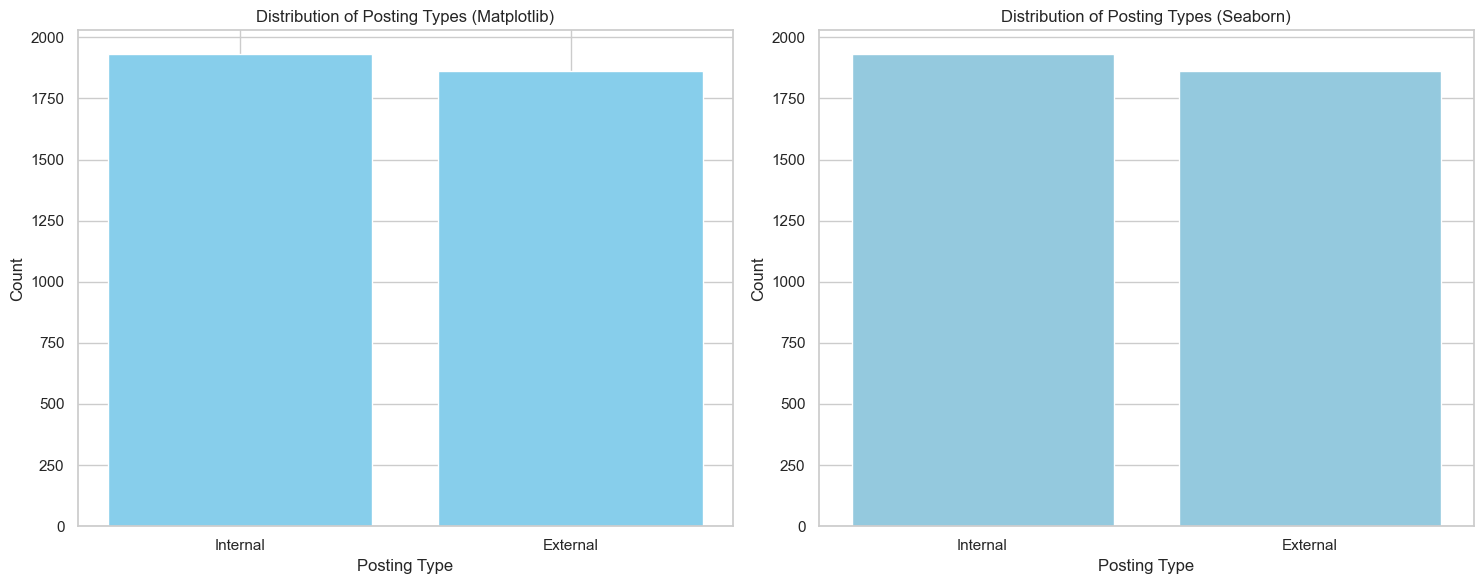

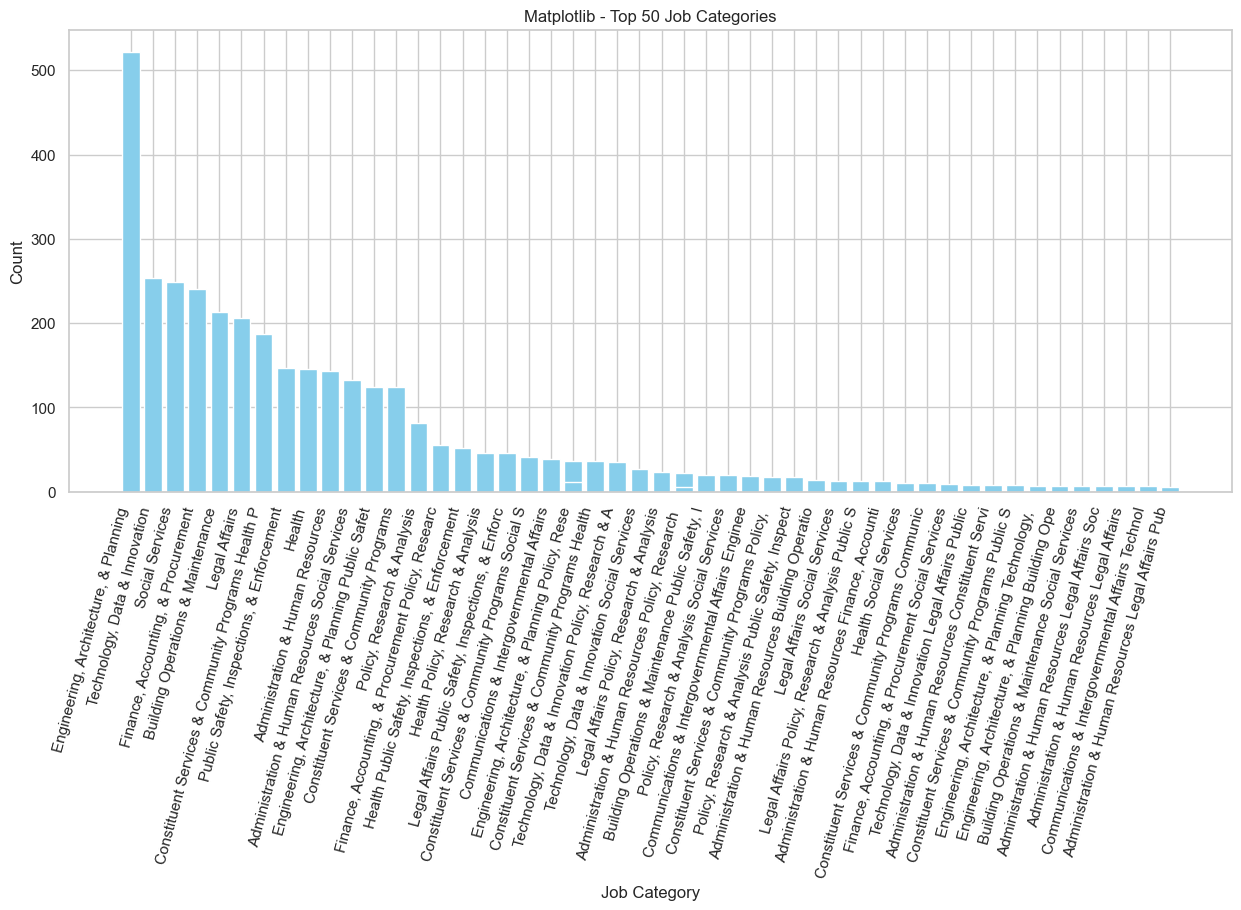

/Users/sumantgupta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


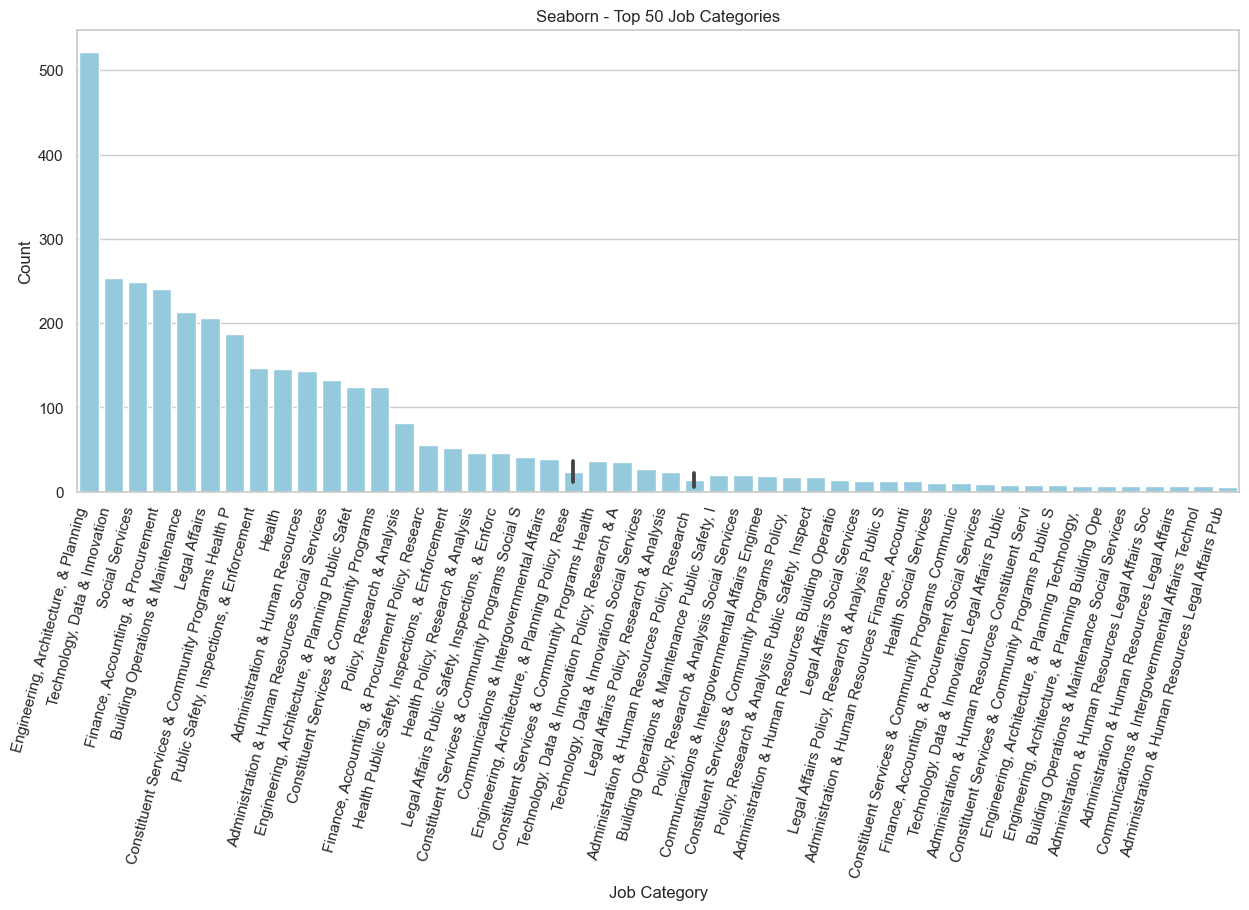

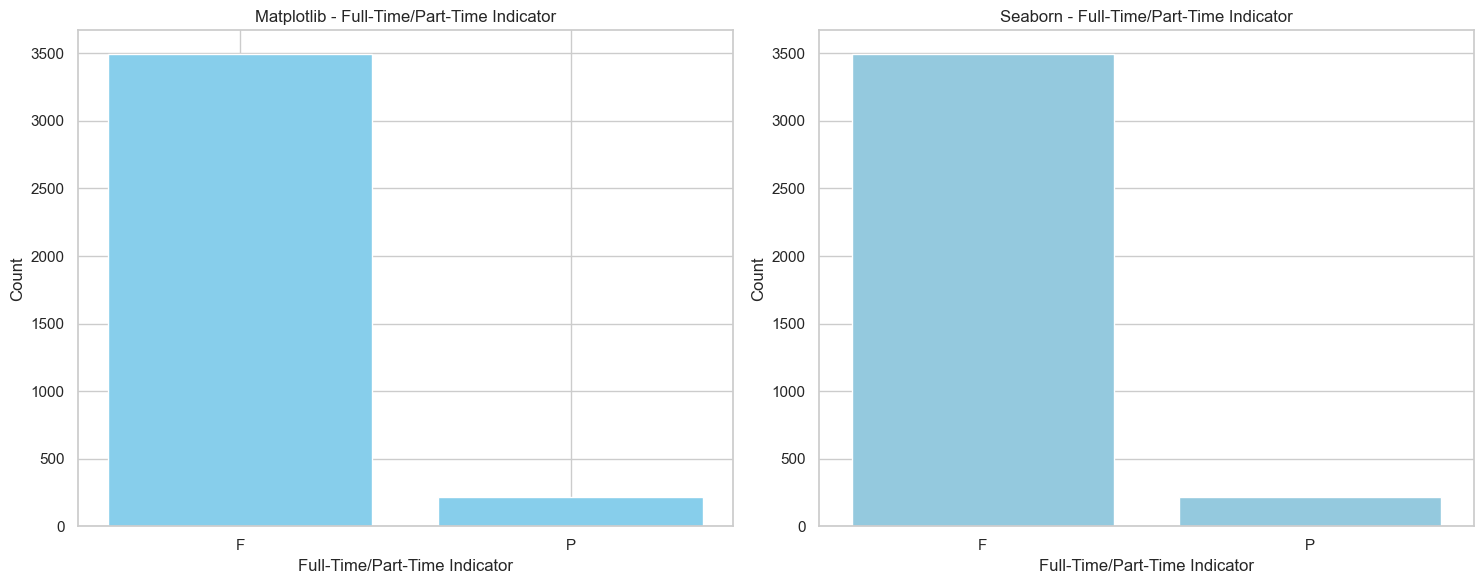

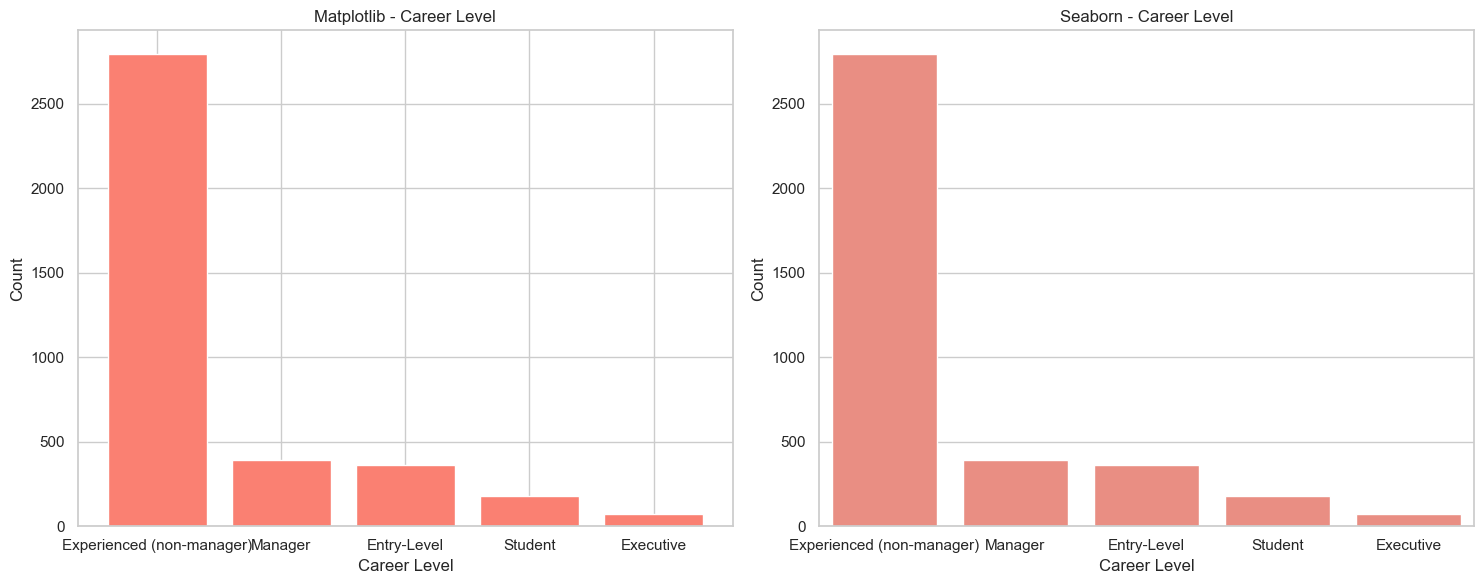

/Users/sumantgupta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


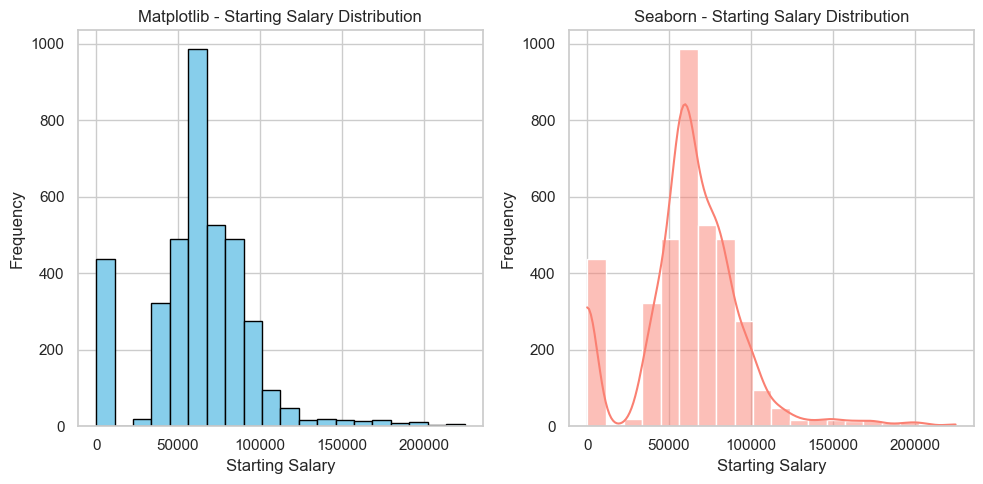

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for Seaborn
sns.set(style="whitegrid")

# Example for Posting Type
posting_type_counts = df['Posting Type'].value_counts()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plotting bar chart using Matplotlib
axes[0].bar(posting_type_counts.index, posting_type_counts.values, color='skyblue')
axes[0].set_title('Distribution of Posting Types (Matplotlib)')
axes[0].set_xlabel('Posting Type')
axes[0].set_ylabel('Count')

# Plotting bar chart using Seaborn
sns.barplot(x=posting_type_counts.index, y=posting_type_counts.values, color='skyblue', ax=axes[1])
axes[1].set_title('Distribution of Posting Types (Seaborn)')
axes[1].set_xlabel('Posting Type')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------------------------------------------------------------

# Example for Job Category
job_category_counts = df['Job Category'].value_counts()

# # Matplotlib plot
# plt.figure(figsize=(10, 6))
# plt.bar(job_category_counts.index, job_category_counts.values, color='skyblue')
# plt.title('Matplotlib - Job Category')
# plt.xlabel('Job Category')
# plt.ylabel('Count')
# plt.xticks(rotation=45, ha='right')
# plt.show()

# # Seaborn plot
# plt.figure(figsize=(10, 6))
# sns.barplot(x=job_category_counts.index, y=job_category_counts.values, color='skyblue')
# plt.title('Seaborn - Job Category')
# plt.xlabel('Job Category')
# plt.ylabel('Count')
# plt.xticks(rotation=45, ha='right')
# plt.show()

# Example for Job Category
top_job_categories = df['Job Category'].value_counts().nlargest(50)

# Truncate labels to 100 characters
truncated_labels = [label[:50] for label in top_job_categories.index]

# Matplotlib plot
plt.figure(figsize=(15, 6))
plt.bar(truncated_labels, top_job_categories.values, color='skyblue')
# plt.bar(top_job_categories.index, top_job_categories.values, color='skyblue')
plt.title('Matplotlib - Top 50 Job Categories')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.xticks(rotation=75, ha='right')
plt.show()

# Seaborn plot
plt.figure(figsize=(15, 6))
sns.barplot(x=truncated_labels, y=top_job_categories.values, color='skyblue')
# sns.barplot(x=top_job_categories.index, y=top_job_categories.values, color='skyblue')
plt.title('Seaborn - Top 50 Job Categories')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.xticks(rotation=75, ha='right')
plt.show()


# ------------------------------------------------------------------------------------------------------------------------------
# Example for Full-Time/Part-Time Indicator
ft_pt_counts = df['Full-Time/Part-Time indicator'].value_counts()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Matplotlib plot
axes[0].bar(ft_pt_counts.index, ft_pt_counts.values, color='skyblue')
axes[0].set_title('Matplotlib - Full-Time/Part-Time Indicator')
axes[0].set_xlabel('Full-Time/Part-Time Indicator')
axes[0].set_ylabel('Count')

# Seaborn plot
sns.barplot(x=ft_pt_counts.index, y=ft_pt_counts.values, color='skyblue', ax=axes[1])
axes[1].set_title('Seaborn - Full-Time/Part-Time Indicator')
axes[1].set_xlabel('Full-Time/Part-Time Indicator')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------------------------------------------------------------

# Example for Career Level
career_level_counts = df['Career Level'].value_counts()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Matplotlib plot
axes[0].bar(career_level_counts.index, career_level_counts.values, color='salmon')
axes[0].set_title('Matplotlib - Career Level')
axes[0].set_xlabel('Career Level')
axes[0].set_ylabel('Count')

# Seaborn plot
sns.barplot(x=career_level_counts.index, y=career_level_counts.values, color='salmon', ax=axes[1])
axes[1].set_title('Seaborn - Career Level')
axes[1].set_xlabel('Career Level')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


# ------------------------------------------------------------------------------------------------------------------------------

# Matplotlib plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['Salary Range From'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Matplotlib - Starting Salary Distribution')
plt.xlabel('Starting Salary')
plt.ylabel('Frequency')

# Seaborn plot
plt.subplot(1, 2, 2)
sns.histplot(df['Salary Range From'], bins=20, color='salmon', kde=True)
plt.title('Seaborn - Starting Salary Distribution')
plt.xlabel('Starting Salary')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Diagram Description

Distribution of Posting Types (Matplotlib and Seaborn):
For the internal posting type, it has been published almost 1900 times, while the external posting type has been published nearly 1800 times. These bar charts illustrate the distribution of different posting types, indicating the frequency of internal and external job postings within the dataset.

Top 50 Job Categories (Matplotlib and Seaborn):
The highest bar on the histogram represents the job category( Engineering, Architecture & Planning) with the highest frequency of job postings, while the lowest is Administration & Human Resources. The heights of the bars in between represent the frequencies of the other job categories, ordered by their respective frequencies from highest to lowest among the top 50 categories.

Full-Time/Part-Time Indicator (Matplotlib and Seaborn):
There are around 3500 full-time job postings and approximately 1500 part-time job postings.
These visualizations depict the distribution of job postings based on whether they are full-time or part-time, providing insights into the balance between these two types of employment opportunities within the dataset.

Career Level (Matplotlib and Seaborn):
The entry-level positions are the most common, with over 2700 job postings, while executive-level positions have around 50 postings.
These bar charts show the distribution of job postings across different career levels, offering insights into the prevalence of entry-level, mid-level, and senior-level positions within the dataset.
 
Starting Salary Distribution (Matplotlib and Seaborn):
The starting salaries range from $40,000 to $100,000, with a peak of around $60,000 to $70,000.These histograms provide a visual representation of the distribution of starting salaries for job postings, allowing viewers to understand the common salary ranges and their frequencies within the dataset.


## Part 4: Inference – Perform whatever analysis is necessary to answer your research question. Your analysis should include at least one graphic, and for each graphic you create you must do so using both Matplotlib and Seaborn (as described in Part 3 above). Include a narrative explaining your research approach and findings and be sure to include any Python code used as part of your work.

### RQ1: How does the demand change over time for particular employment roles in New York City?

Index(['Job Category', 'Posting Date', 'Full-Time/Part-Time indicator',
       'Salary Range From', 'Salary Range To'],
      dtype='object')


/Users/sumantgupta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sumantgupta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


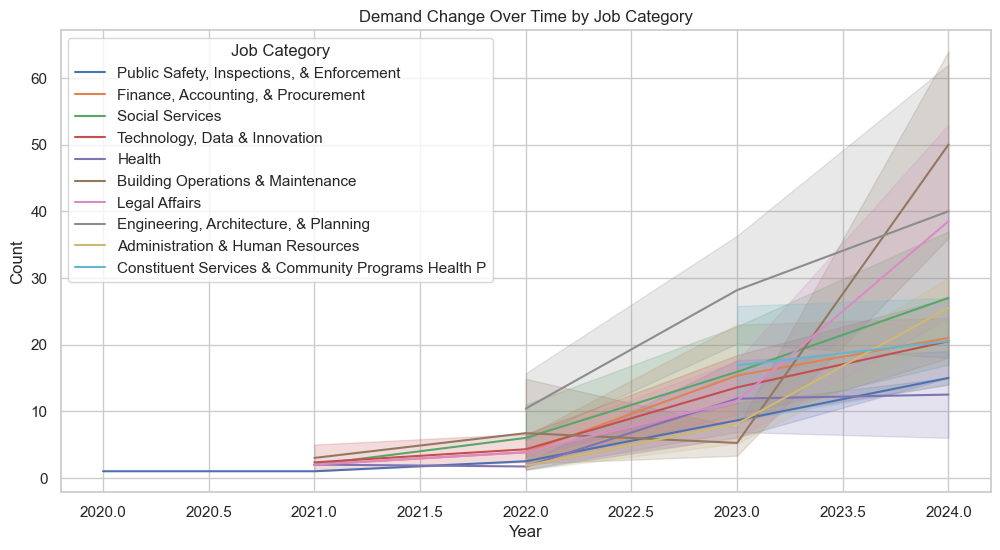

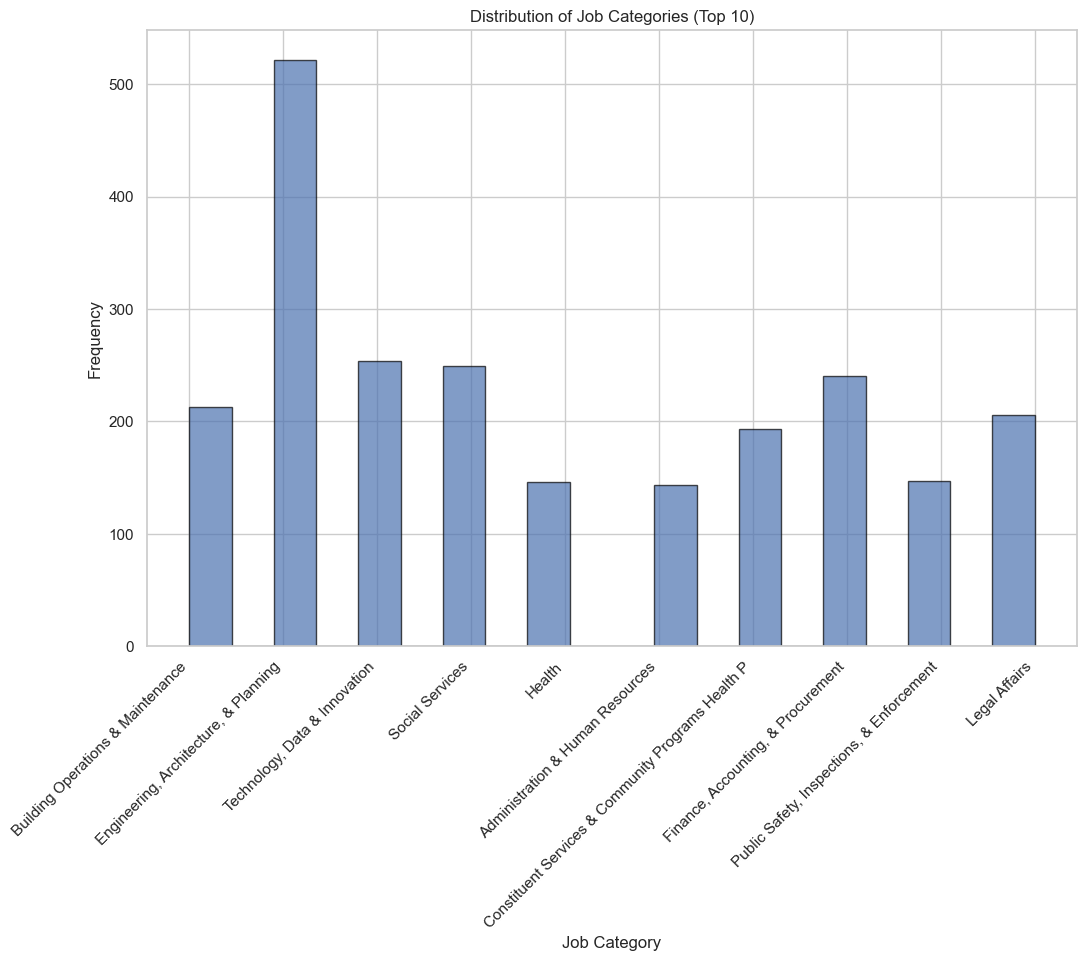

/Users/sumantgupta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


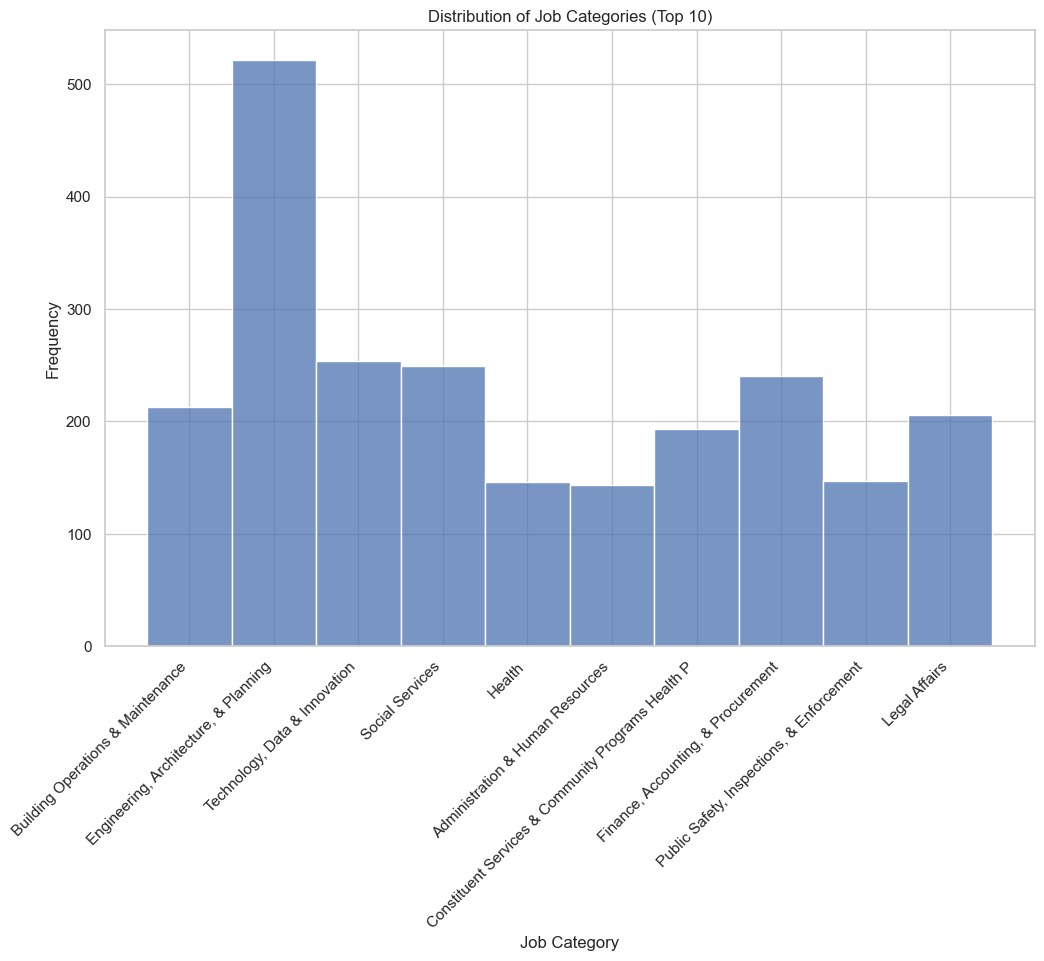

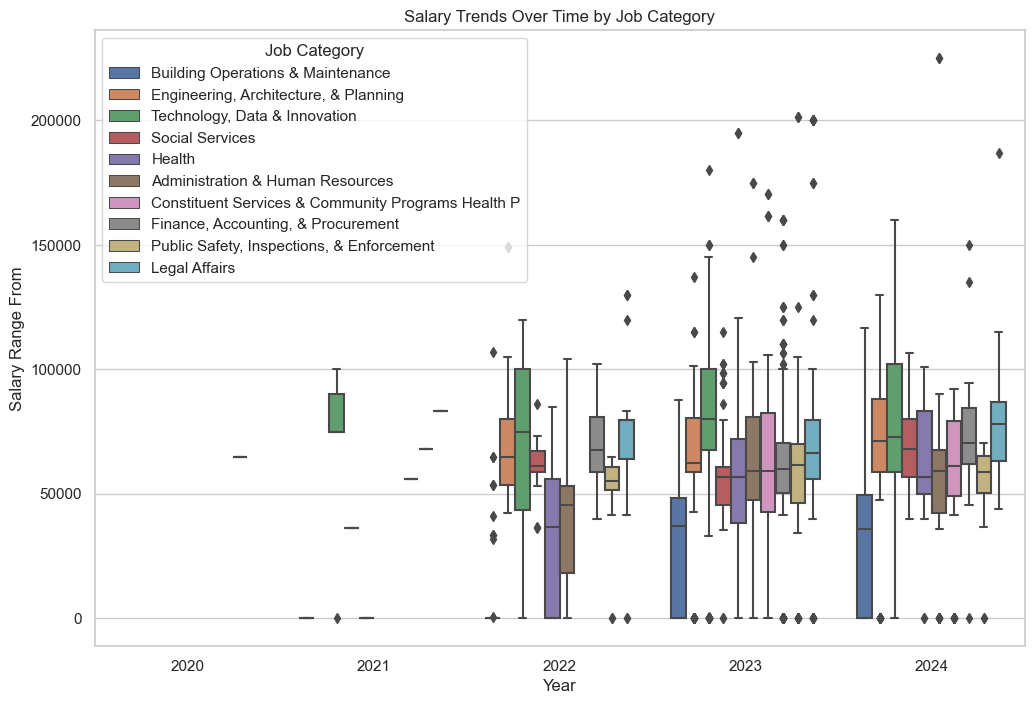

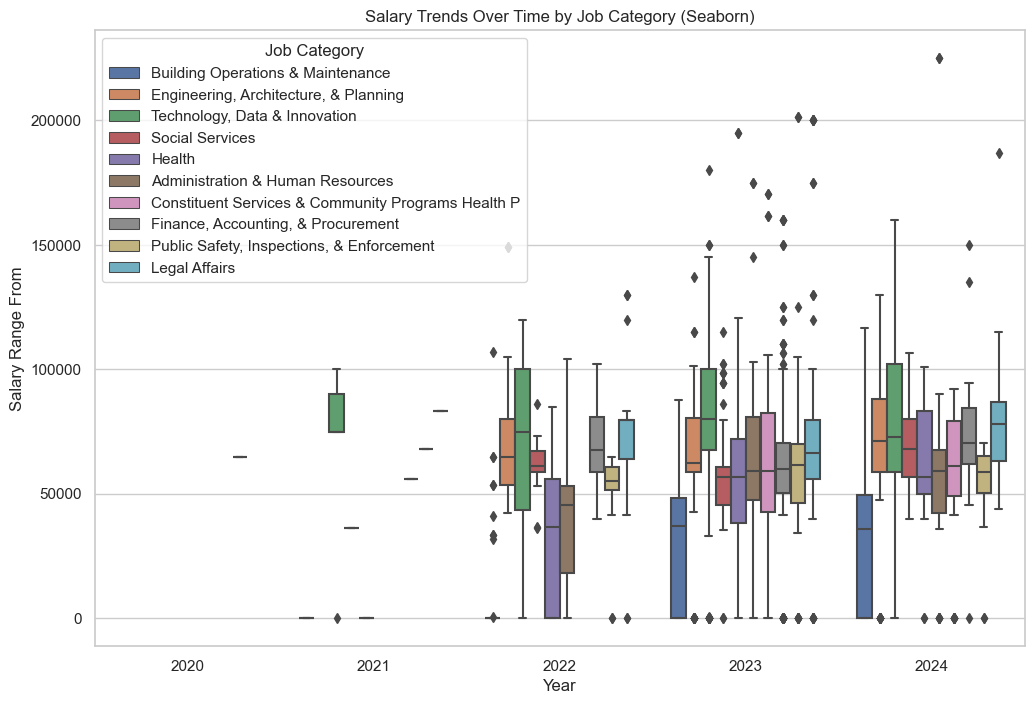

In [4]:
 
# Data Preparation:
# Extract relevant columns like "Job Category," "Posting Date," and other attributes of interest.
    
import pandas as pd

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/justsumant/DAV-5400/main/Jobs_NYC_Postings_20240219.csv')

# Extract relevant columns
relevant_columns = ['Job Category', 'Posting Date', 'Full-Time/Part-Time indicator', 'Salary Range From', 'Salary Range To']
df = df[relevant_columns]
print(df.columns)

# Limit the character length of 'job_category' column to 50
df['Job Category'] = df['Job Category'].str[:50]

# Keep only the top 10 categories for better visualization
top_10_categories = df['Job Category'].value_counts().head(10).index
df = df[df['Job Category'].isin(top_10_categories)]

# Data Cleaning:
# Convert 'Posting Date' to datetime
df['Posting Date'] = pd.to_datetime(df['Posting Date'], errors='coerce')

# Handle missing values
df.dropna(subset=['Job Category', 'Posting Date'], inplace=True)


# Temporal Analysis:
# Extract year and month from 'Posting Date'
df['Year'] = df['Posting Date'].dt.year
df['Month'] = df['Posting Date'].dt.month

# Group data by year, month, and job category
grouped_data = df.groupby(['Year', 'Month', 'Job Category']).size().reset_index(name='Count')


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot for overall demand change
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Count', hue='Job Category', data=grouped_data)
plt.title('Demand Change Over Time by Job Category')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the histogram using matplot
plt.figure(figsize=(12, 8))
plt.hist(df['Job Category'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Job Categories (Top 10)')
plt.xlabel('Job Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the histogram using seaborn
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Job Category', bins=20, kde=False)
plt.title('Distribution of Job Categories (Top 10)')
plt.xlabel('Job Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()



# Salary Analysis:
# Boxplot for salary trends
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Salary Range From', hue='Job Category', data=df)
plt.title('Salary Trends Over Time by Job Category')
plt.xlabel('Year')
plt.ylabel('Salary Range From')
plt.show()

# Boxplot for salary trends using Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Salary Range From', hue='Job Category', data=df)
plt.title('Salary Trends Over Time by Job Category (Seaborn)')
plt.xlabel('Year')
plt.ylabel('Salary Range From')
plt.show()



#### Code Description:
The above Python code performs a comprehensive analysis of job postings in New York City, focusing on temporal trends, job categories, and salary variations. The relevant columns, including "Job Category," "Posting Date," and salary-related attributes, are extracted for further analysis.

The 'job_category' column is preprocessed by limiting the character length to 50 and selecting the top 10 categories for better visualization. Temporal analysis involves converting the 'Posting Date' to datetime format, extracting the year and month, and grouping the data by year, month, and job category. The resulting grouped data is visualized using a line plot, illustrating the overall demand change over time for each job category.

The code also includes a histogram plot using both Matplotlib and Seaborn to visualize the distribution of job categories. The Seaborn histogram is customized with a white grid style for enhanced aesthetics.

Furthermore, a salary analysis is conducted with a boxplot illustrating salary trends over time by job category. This provides insights into the salary variations within different job categories across years.

Overall, the code serves as a robust tool for exploring and visualizing patterns within the job postings dataset, shedding light on temporal trends, popular job categories, and salary dynamics. The combination of Matplotlib and Seaborn visualizations enhances the clarity and interpretability of the analysis.

#### Graph Description:
Demand change over time:
The plot illustrates how the demand for job postings within various job categories has evolved over the years. The trajectory of each line reflects the trend in demand for that category over time. Rising lines indicate increasing demand, falling lines suggest decreasing demand and stable lines represent consistent demand. Different colors distinguish between job categories, with a legend providing clarity. Overall, the plot enables viewers to identify shifts and patterns in the demand for different job categories over the specified timeframe.


Top 10 Job Categories (Matplotlib and Seaborn):
The highest bar on the histogram represents the job category( Engineering, Architecture & Planning) with the highest frequency of job postings, while the lowest is Administration & Human Resources. The heights of the bars in between represent the frequencies of the other job categories, ordered by their respective frequencies from highest to lowest among the top 10 categories.

Salary trends by job category
Each box in the plot shows where the middle 50% of salaries lie for a specific job category and year. The height of the box indicates this range. Whiskers extend from the boxes to show the salary range beyond the middle 50%. Anything beyond the whiskers is considered an outlier. A line inside each box represents the median starting salary for that job category and year. Comparing boxplots across different years and job categories allows viewers to see if median salaries have changed over time. Whisker length and position indicate salary variability, with longer whiskers suggesting greater variability. Outliers beyond the whiskers can highlight exceptionally high or low starting salaries for certain job categories in specific years.




### RQ2: What is the distribution of job postings in New York City across different agencies?

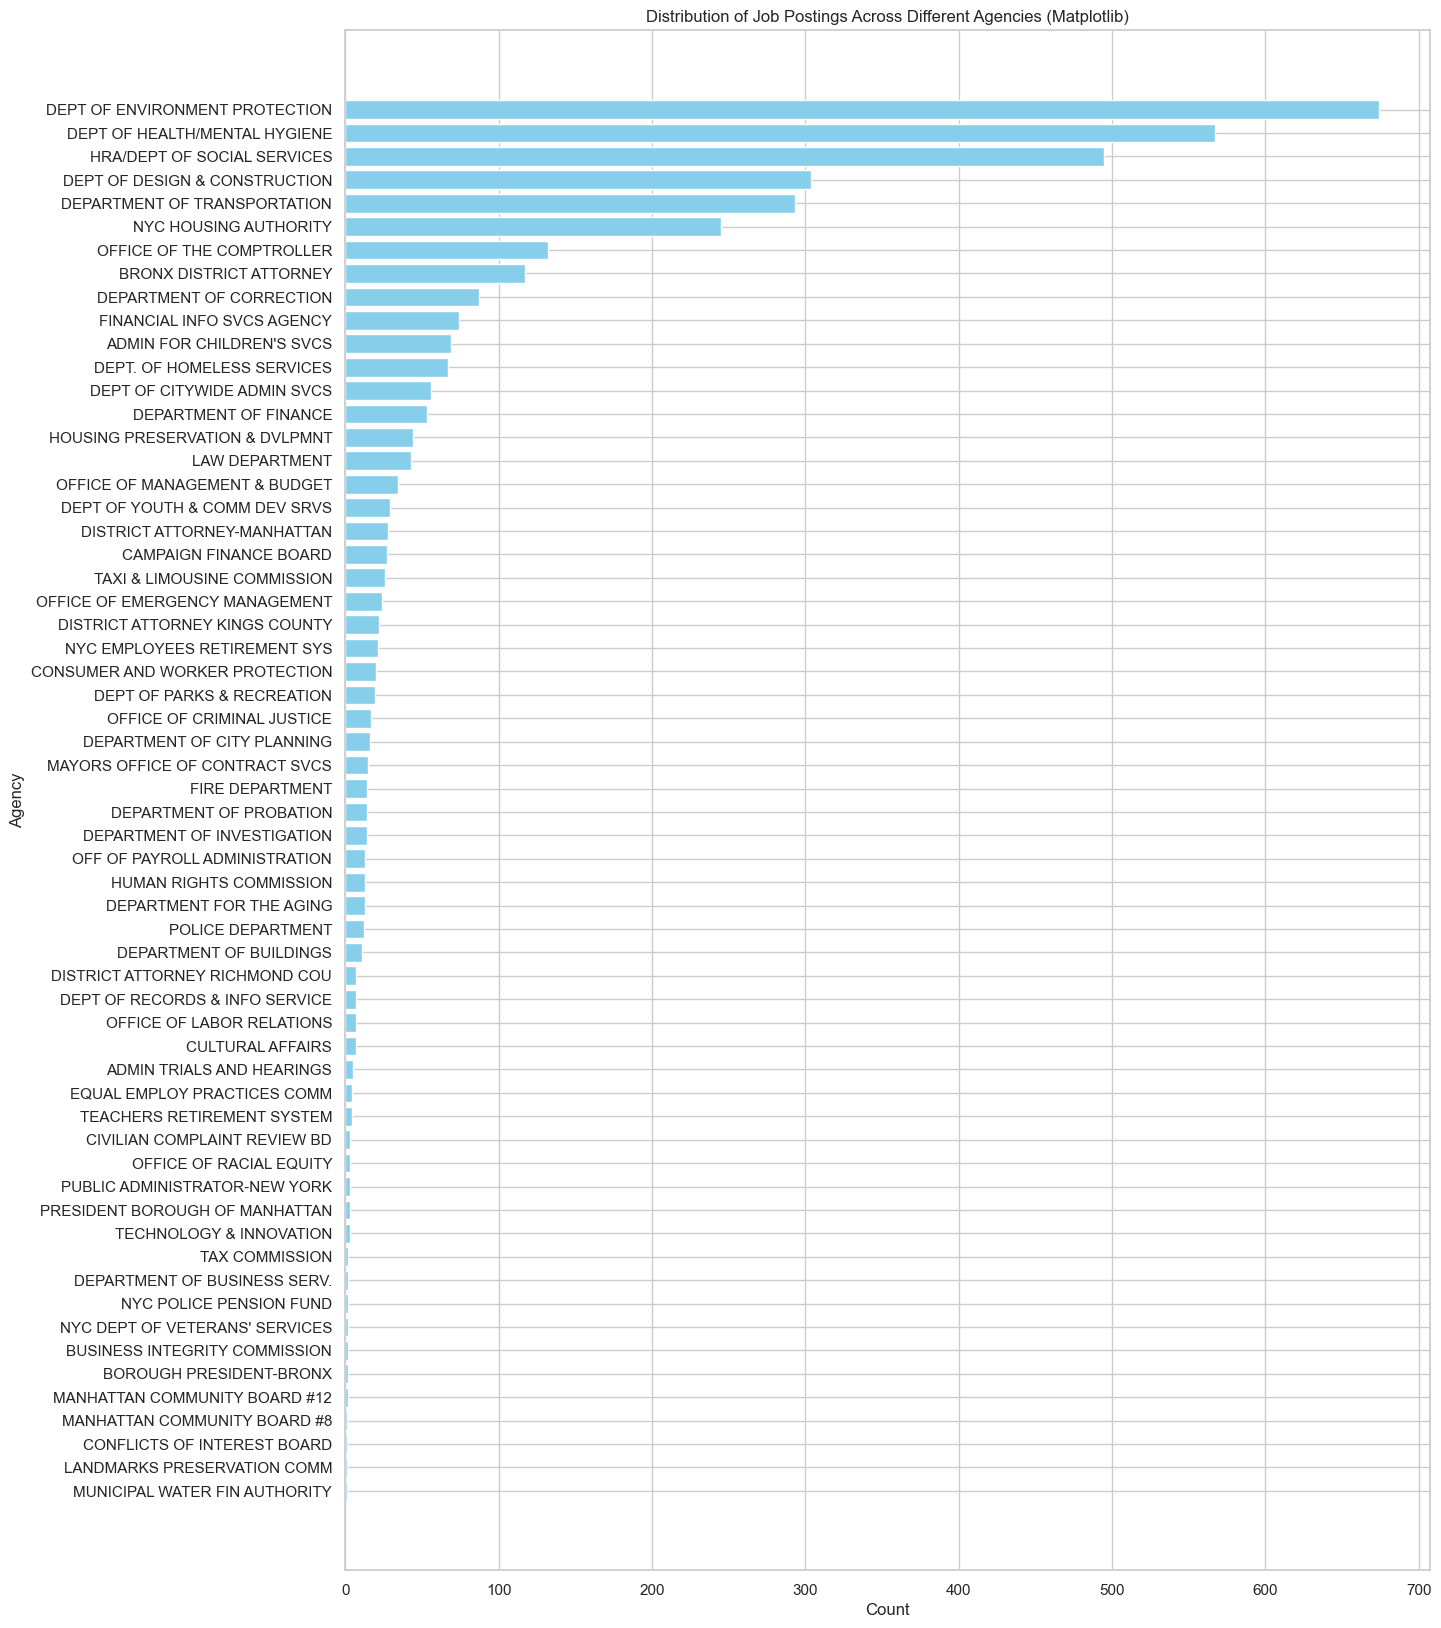

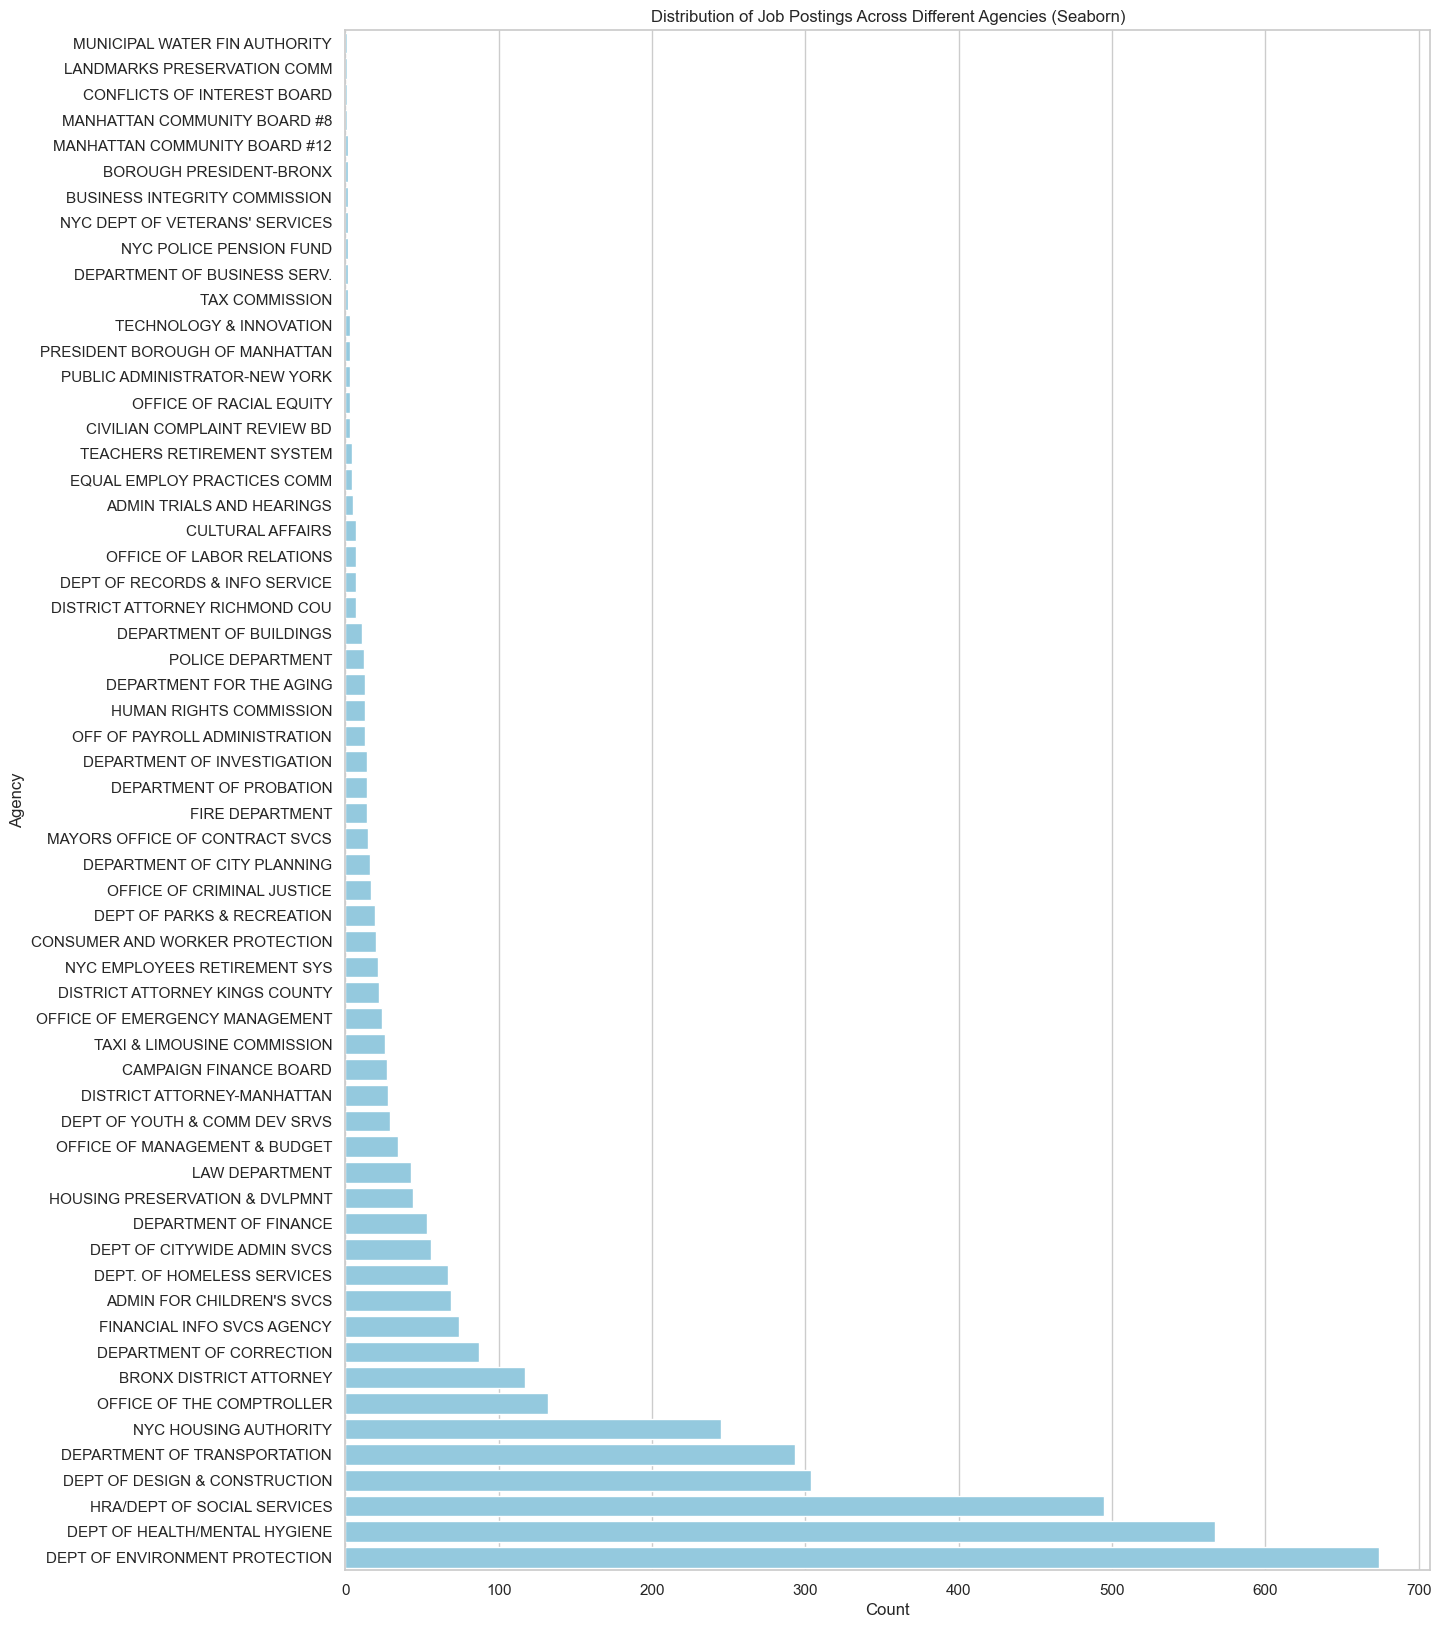

In [5]:
# Data Preparation:
# Extract relevant columns like "Agency," "Posting Date," and other attributes of interest.
import pandas as pd

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/justsumant/DAV-5400/main/Jobs_NYC_Postings_20240219.csv')

# Extract relevant columns
relevant_columns = ['Agency', 'Posting Date', 'Full-Time/Part-Time indicator', 'Salary Range From', 'Salary Range To']
df = df[relevant_columns]

# Data Cleaning:
# Convert 'Posting Date' to datetime
df['Posting Date'] = pd.to_datetime(df['Posting Date'], errors='coerce')

# Handle missing values
df.dropna(subset=['Agency', 'Posting Date'], inplace=True)

# Agency-wise Distribution Analysis:
# Group data by agency
agency_distribution = df.groupby(['Agency']).size().reset_index(name='Count')

# Visualization using Seaborn:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by 'Count' in descending order
agency_distribution_sorted = agency_distribution.sort_values('Count')

# Bar plot for agency-wise distribution using Matplotlib with explicit order
plt.figure(figsize=(14, 20))
plt.barh(agency_distribution_sorted['Agency'], agency_distribution_sorted['Count'], color='skyblue')
plt.title('Distribution of Job Postings Across Different Agencies (Matplotlib)')
plt.xlabel('Count')
plt.ylabel('Agency')
plt.show()

# Bar plot for agency-wise distribution using Seaborn with explicit order
plt.figure(figsize=(14, 20))
sns.barplot(x='Count', y='Agency', data=agency_distribution_sorted, color='skyblue')
plt.title('Distribution of Job Postings Across Different Agencies (Seaborn)')
plt.xlabel('Count')
plt.ylabel('Agency')
plt.show()


The above code analyzes job posting data for New York City, focusing on the distribution of job postings across different agencies. The data is loaded and relevant columns such as "Agency," "Posting Date," "Full-Time/Part-Time indicator," "Salary Range From," and "Salary Range To" are extracted.

Data cleaning steps involve converting the "Posting Date" column to datetime format and handling missing values. The analysis primarily focuses on agency-wise distribution and a DataFrame is created to represent the count of job postings for each agency.

Seaborn and Matplotlib both are employed for visualization. The bar plots depict the distribution of job postings across different agencies, with agencies sorted by the count of postings in descending order. Both Matplotlib and Seaborn visualizations provide clear insights into the job landscape in New York City, emphasizing the prominence of certain agencies in terms of job opportunities.

This allows for a detailed examination of how job postings are distributed among various agencies, aiding in understanding the employment landscape and identifying key players in the job market.

#### Graph Description
The graphs provide a visual comparison of the number of job postings across different agencies, here the x-axis represents the count of the postings where the y-axis presents the name of the agencies totally the bars here represent the number of job postings for particular agencies. The Department of Environment Protection Agency has postings which are more than 600 whereas the Department of Mental Hygiene has postings below 600 the Department of Social Services has 500 postings approximately. The Department of Design and Construction and the Department of Transportation have postings of around 300 and the number of postings for the other departments is gradually decreasing. Where municipal water fin authority and Landmarks Preservation comm, conflicts of the Interset board and Manhattan Community Board #8 these are the agencies that have zero postings. These graphs will assist the stakeholders in understanding the employment landscape within the city and can identify the trends for investigation.

# Conclusion: Analyzing Job Postings in New York City

The exploration of job postings in New York City provided valuable insights into the employment landscape, encompassing various facets such as job categories, agency-wise distribution, temporal trends, and salary dynamics. Leveraging the provided dataset, the analyses employed a combination of Python libraries, including Pandas, Matplotlib, and Seaborn, to extract, clean, and visualize the data.

#### Job Categories Analysis:
The investigation into job categories involved exploring the distribution of job postings across different occupational groups. The dataset's richness allowed for a detailed breakdown, revealing insights into the diversity of employment opportunities. The focus on the top 50 job categories facilitated a more manageable representation, ensuring clarity in the visualizations.

#### Agency-Wise Distribution:
The agency-wise distribution analysis delved into understanding how job opportunities were dispersed among different organizations. This provided a comprehensive overview of the key players in the job market, allowing job seekers and researchers to identify agencies with prominent job postings. The bar plots created using both Matplotlib and Seaborn showcased the distribution, highlighting the agencies with the highest job counts.

#### Temporal Trends:
Temporal trends analysis aimed to uncover how job demand changed over time. Extracting year and month information from the 'Posting Date,' the analysis showcased the fluctuations in job postings across different job categories. The line plot depicted the overall demand change, offering a dynamic perspective on the evolving job market in New York City.

#### Salary Trends:
Exploring salary trends involved a boxplot analysis, examining the salary range variations across different job categories over the years. This analysis enabled job seekers to gain insights into the salary dynamics associated with various job roles, contributing to informed decision-making.

#### Concluding Insights:
The analyses collectively provided a nuanced understanding of the job market in New York City. Job seekers can benefit from insights into popular job categories, key agencies with substantial job postings, and trends in job demand and salaries. Researchers and policymakers can leverage this information to identify areas of growth, assess the demand for specific skills, and inform workforce development initiatives.

While the analyses focused on specific dimensions, the dataset's breadth allows for further explorations and tailored investigations. The code's adaptability ensures that future analyses can be seamlessly integrated, offering a dynamic framework for ongoing insights into New York City's job landscape.

In conclusion, the analyses conducted not only illuminate the current state of job postings but also lay the groundwork for continued exploration and understanding of the dynamic employment ecosystem in the city. The code and insights derived from it serve as a valuable resource for individuals navigating the job market and stakeholders shaping policies related to workforce development and economic growth.







# References
1. Data collection: https://data.cityofnewyork.us/City-Government/Jobs-NYC-Postings/kpav-sd4t/about_data
2. Data collection website: https://data.cityofnewyork.us
3. Matplot documentation: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
4. Seaborn documentation: https://seaborn.pydata.org/tutorial/distributions.html 
